[36, 48, 55, 60, 64, 67, 43, 72, 74, 76, 52, 79, 41, 83, 45, 84, 62, 40, 53, 71, 57, 39, 73, 50, 75, 44, 65, 66, 81, 68, 69, 59, 51, 61, 38, 63, 56, 77, 78, 54, 80, 47, 82, 49, 46, 58, 42, 37, 70]
[37, 49, 56, 61, 65, 68, 44, 73, 75, 77, 53, 80, 42, 84, 46, 63, 41, 54, 72, 58, 40, 74, 51, 76, 45, 66, 67, 82, 69, 70, 60, 52, 62, 39, 64, 57, 78, 79, 55, 81, 48, 83, 50, 47, 59, 43, 38, 36, 71]
[38, 50, 57, 62, 66, 69, 45, 74, 76, 78, 54, 81, 43, 47, 64, 42, 55, 73, 59, 41, 75, 52, 77, 46, 67, 68, 83, 70, 71, 61, 53, 63, 40, 36, 65, 58, 79, 80, 56, 82, 49, 84, 51, 48, 60, 44, 39, 37, 72]
[39, 51, 58, 63, 67, 70, 46, 75, 77, 79, 55, 82, 44, 48, 65, 43, 56, 74, 60, 42, 36, 76, 53, 78, 47, 68, 69, 84, 71, 72, 62, 54, 64, 41, 37, 66, 59, 80, 81, 57, 83, 50, 52, 49, 61, 45, 40, 38, 73]
[40, 52, 59, 64, 68, 71, 47, 76, 78, 80, 56, 83, 45, 49, 66, 44, 36, 57, 75, 61, 43, 37, 77, 54, 79, 48, 69, 70, 72, 73, 63, 55, 65, 42, 38, 67, 60, 81, 82, 58, 84, 51, 53, 50, 62, 46, 41, 39, 74]
[41, 53, 60, 65

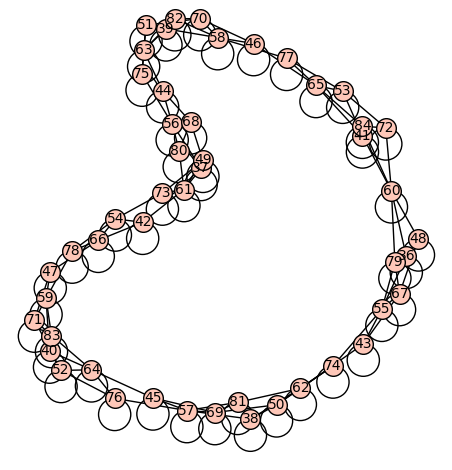

True
{36: {36: 0.0, 48: 1.0, 55: 1.1547005383792515, 60: 1.224744871391589}, 48: {36: 1.0, 48: 0.0, 60: 1.0, 67: 1.1547005383792515}, 55: {36: 1.1547005383792515, 55: 0.0, 74: 1.1547005383792515, 43: 1.0, 67: 1.0, 79: 1.224744871391589}, 60: {36: 1.224744871391589, 48: 1.0, 60: 0.0, 41: 1.1547005383792515, 72: 1.0, 84: 1.224744871391589, 79: 1.1547005383792515}, 37: {37: 0.0, 49: 1.0, 56: 1.1547005383792515, 61: 1.224744871391589}, 49: {37: 1.0, 49: 0.0, 73: 1.224744871391589, 61: 1.0, 68: 1.1547005383792515}, 56: {37: 1.1547005383792515, 56: 0.0, 75: 1.1547005383792515, 80: 1.224744871391589, 44: 1.0, 68: 1.0}, 61: {37: 1.224744871391589, 49: 1.0, 73: 1.0, 42: 1.1547005383792515, 61: 0.0, 80: 1.1547005383792515}, 38: {38: 0.0, 50: 1.0, 57: 1.1547005383792515, 62: 1.224744871391589}, 50: {38: 1.0, 74: 1.224744871391589, 50: 0.0, 62: 1.0, 69: 1.1547005383792515}, 57: {38: 1.1547005383792515, 81: 1.224744871391589, 57: 0.0, 76: 1.1547005383792515, 45: 1.0, 69: 1.0}, 62: {38: 1.2247448713

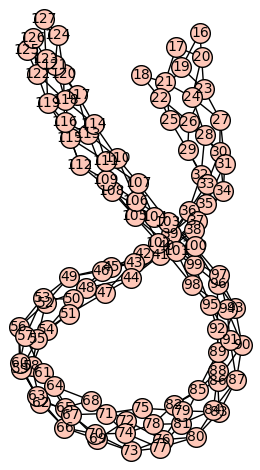

written


In [242]:
import numpy as np


def writeYaml(filename,dictionary):    
    import yaml
    import io

    # Write YAML file
    with io.open(filename, 'w', encoding='utf8') as outfile:
        yaml.dump(dictionary, outfile, default_flow_style=False, allow_unicode=True)

def readYaml(filename):        
    # Read YAML file
    import yaml
    with open(filename, 'r') as stream:
        data_loaded = yaml.safe_load(stream)
    return data_loaded 

def getRational(k):
    alpha = 2**(1/12.0)
    x = RDF(alpha**k).n(50)
    return x.nearby_rational(max_error=0.01*x)

def kernPitch(k1,k2):
    q = getRational(k2-k1)
    a,b = q.numerator(),q.denominator()
    return gcd(a,b)**2/(a*b)
    #return 2*gcd(a,b)**3/(a*b*(a+b))

G = Graph(loops=True)
KNN = 1+3
idp = list(range(60-2*12,60+2*12+1))
pitchsim = dict([])
for p1 in idp:
    G.add_vertex(p1)
    sp = sorted([(kernPitch(p1,p2),p2) for p2 in idp ],reverse=True)
    perm = [x[1] for x in sp]
    pitchsim[p1] = perm
    print(perm)
    ss = sp[0:KNN]
    for t in ss:
        k,p = t
        G.add_edge(p1,p,float(np.sqrt(2*(1-k))))
plot(G).show()     
print(G.is_connected())
print(G.to_dictionary(edge_labels=True))

writeYaml("pitch_similarity.yaml",pitchsim)
writeYaml("simliarity_graph_3.yaml",dict(G.to_dictionary(edge_labels=True)))

def writePitches(fn,inds,tempo=82,instrument=[0,0],add21=True,start_at= [0,0],durationsInQuarterNotes=False):
    from MidiFile import MIDIFile

    track    = 0
    channel  = 0
    time     = 0   # In beats
    duration = 1   # In beats # In BPM
    volume   = 116 # 0-127, as per the MIDI standard

    ni = len(inds)
    MyMIDI = MIDIFile(ni,adjust_origin=False) # One track, defaults to format 1 (tempo track
                     # automatically created)
    MyMIDI.addTempo(track,time, tempo)


    for k in range(ni):
        MyMIDI.addProgramChange(k,k,0,instrument[k])


    times = start_at
    for k in range(len(inds)):
        channel = k
        track = k
        for i in range(len(inds[k])):
            pitch,duration,volume,isPause,tempo = inds[k][i]
            #print(pitch,duration,volume,isPause)
            track = k
            channel = k
            if not durationsInQuarterNotes:
                duration = 4*duration#*maxDurations[k] #findNearestDuration(duration*12*4)            
            #print(k,pitch,times[k],duration,100)
            if not isPause: #rest
                #print(volumes[i])
                # because of median:
                pitch = int(np.floor(pitch))
                if add21:
                    pitch += 21
                #print(pitch,times[k],duration,volume,isPause)    
                MyMIDI.addTempo(track,times[k], tempo)
                MyMIDI.addNote(track, channel, int(pitch), float(times[k]) , float(duration), int(volume))
                times[k] += duration*1.0  
            else:
                times[k] += duration*1.0
       
    with open(fn, "wb") as output_file:
        MyMIDI.writeFile(output_file)
    print("written")  

def run_length_encoding(seq):
    compressed = []
    count = 1
    char = seq[0]
    for i in range(1,len(seq)):
        if seq[i] == char:
            count = count + 1
        else:
            compressed.append([char,count])
            char = seq[i]
            count = 1
    compressed.append([char,count])
    return compressed

def getComposition(s):
    v = log(s)/log(2)
    k = int(floor(v))
    d = Integer(s).digits(2,padto=k+1)
    rl = run_length_encoding(d)
    #print(t,d,rl)
    comp  = [x[1] for x in rl]
    return comp    

def getEncoding(s):
    v = log(s)/log(2)
    k = int(floor(v))
    d = Integer(s).digits(2,padto=k+1)
    return [i for i in range(len(d)) if d[i]==1]

def jacc(s1,s2):
    return len(s1.intersection(s2))/len(s1.union(s2))

def compositionSim(n1,n2):
    return jacc(set(getEncoding(n1)),set(getEncoding(n2)))


#compsim = dict([])
#for n1 in range(1,200):
#    ss = sorted([(compositionSim(n1,n2),-n2) for n2 in range(1,200)],reverse=True)
#    perm = [-x[1] for x in ss]
#    print(perm)
#    compsim[n1] = perm


def HH(start,end):
    H = Graph(loops=False)
    for a in range(start,end+1):
        H.add_vertex(a)
        for b in range(start,end+1):
            if abs(a-b) in [3,4]:
                H.add_edge(a,b)
    return H 

H = HH(16,127)
H.plot().show()


iinds = []
seq = [1,1,2,3]
comps = [44,2340] #50] #,52,54] #
ccomps = [[1,2,1,2,1,2,1,2],[2,1,2,1,2,1,2,1],[1,1,1,1,1,1],[2,2,2]]
#comps = [20,22,26] #,36,38,44,50,52,54]
vols = [32,48,64,64+16,96]
rndbits = [int(x)%2 for x in (str(pi.n(10000)))[2:]]
for r in range(len(ccomps)):
    sv = 50
    vols = []    
    noten = []
    lh=  []
    rh = []    
    durations = []
    for n in range(1,65):
        #cc = getComposition(comps[r])
        cc = ccomps[r]
        S = sum(cc)
        durations.extend([(c/S,n) for c in cc])
    k = 0   
    start = 60-6
    ps = pitchsim[start][0:seq[(k)%len(seq)]]
    ps.reverse() 
    v = 1
    sign = +1
    l = 0
    sd = 0
    while len(durations)>=len(ps):
        if v == len(vols)-1:
            sign = -1
        if v == 0:
            sign = +1
        for i in range(len(ps)):
            vols.extend(H.shortest_path(sv,(sv+10)%(127-16)+16))
            #print(vols)
            sv = vols[-1]
            vol = vols.pop(0)        
            dur,num = durations.pop(0)
            sd+=dur
            octl = (num+r)%3
            octr = (num+r)%2
            if num%23==0:
                octl = 0
                octr = 0
            dd = Integer(num).digits(2,padto=len(ccomps))
            dd.reverse()
            pitch = ps[i]
            pause = (dd[r]==0 and num<=7) or (7<num<=18 and False) or (num>18 and dd[r]==0)
            tempo = 80 if num <= 7 else 120 if num <=18 else 80 if num<=31 else 100 if num<=42 else 120
            noten.append((ps[i],dur,vol,pause,tempo))
            nl = (pitch+3*octl,dur,vol+6*octl,pause,tempo)
            nr = (pitch-4*octr,dur,vol+6*octr,pause,tempo)
            lh.append(nl)
            rh.append(nr)                         
        v+=sign
        start = ps[-1]
        k+=1
        ps = pitchsim[start][0:seq[(k)%len(seq)]]
        #if rndbits.pop(0)==1:
        ps.reverse()        
    iinds.append(noten) 
    if r==1:
        iinds.append(lh)                         
    if r==2:
        iinds.append(rh)                         
fn = "./midi/something_ahead.mid"    
writePitches(fn,iinds,tempo=80,instrument=(len(iinds))*[0],add21=False,start_at= len(iinds)*[0],durationsInQuarterNotes=False)        


In [181]:
for n in range(1,4000):
    cc = getComposition(n)
    if sum(cc)==12 and set(cc)==set([1,2]):
        print(n,getComposition(n))

2340 [2, 1, 2, 1, 2, 1, 2, 1]
2341 [1, 1, 1, 2, 1, 2, 1, 2, 1]
2342 [1, 2, 2, 1, 2, 1, 2, 1]
2345 [1, 2, 1, 1, 1, 2, 1, 2, 1]
2346 [1, 1, 1, 1, 1, 1, 2, 1, 2, 1]
2347 [2, 1, 1, 1, 1, 2, 1, 2, 1]
2348 [2, 2, 1, 1, 2, 1, 2, 1]
2349 [1, 1, 2, 1, 1, 2, 1, 2, 1]
2354 [1, 1, 2, 2, 2, 1, 2, 1]
2355 [2, 2, 2, 2, 1, 2, 1]
2356 [2, 1, 1, 2, 2, 1, 2, 1]
2357 [1, 1, 1, 1, 2, 2, 1, 2, 1]
2358 [1, 2, 1, 2, 2, 1, 2, 1]
2377 [1, 2, 1, 2, 1, 1, 1, 2, 1]
2378 [1, 1, 1, 1, 2, 1, 1, 1, 2, 1]
2379 [2, 1, 1, 2, 1, 1, 1, 2, 1]
2380 [2, 2, 2, 1, 1, 1, 2, 1]
2381 [1, 1, 2, 2, 1, 1, 1, 2, 1]
2386 [1, 1, 2, 1, 1, 1, 1, 1, 2, 1]
2387 [2, 2, 1, 1, 1, 1, 1, 2, 1]
2388 [2, 1, 1, 1, 1, 1, 1, 1, 2, 1]
2389 [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1]
2390 [1, 2, 1, 1, 1, 1, 1, 1, 2, 1]
2393 [1, 2, 2, 1, 1, 1, 1, 2, 1]
2394 [1, 1, 1, 2, 1, 1, 1, 1, 2, 1]
2395 [2, 1, 2, 1, 1, 1, 1, 2, 1]
2404 [2, 1, 2, 2, 1, 1, 2, 1]
2405 [1, 1, 1, 2, 2, 1, 1, 2, 1]
2406 [1, 2, 2, 2, 1, 1, 2, 1]
2409 [1, 2, 1, 1, 2, 1, 1, 2, 1]
2410 [1, 1, 1, 1, 1